___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___

# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Data Visualization - 2</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Use below dataframe for plots**

In [2]:
income = [100, 80, 150, 48, 52, 69, 88]
expense = [30, 100, 100, 20, 75, 50, 28]
index = ['A', 'B', 'C','D', 'E', 'F', 'G']
df = pd.DataFrame({'income': income,'expense': expense}, index=index)
df.head()

,income,expense
A,100,30
B,80,100
C,150,100
D,48,20
E,52,75


# Bar plots

## 1. Set darkgrid style from seaborn

In [3]:
sns.set_style("darkgrid")

# 2. Make a bar plot

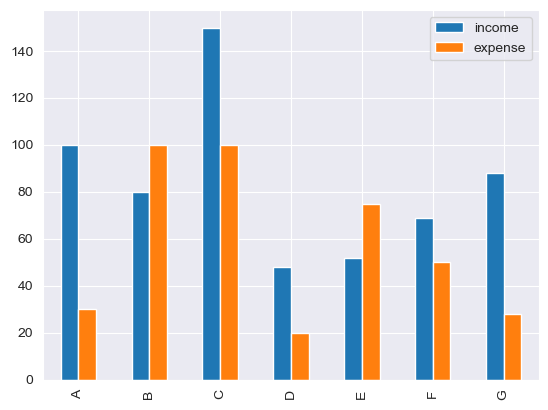

In [4]:
# With Pandas

df.plot.bar();

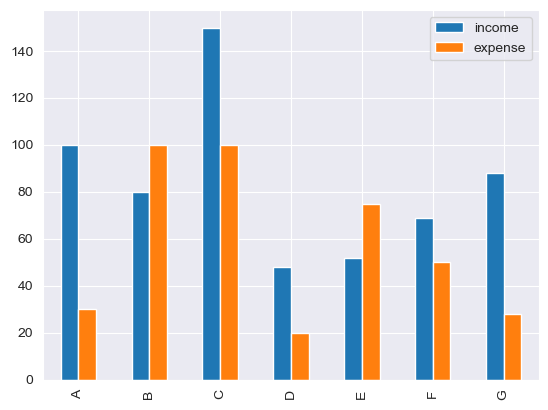

In [5]:
# With Pandas

df.plot(kind = "bar");

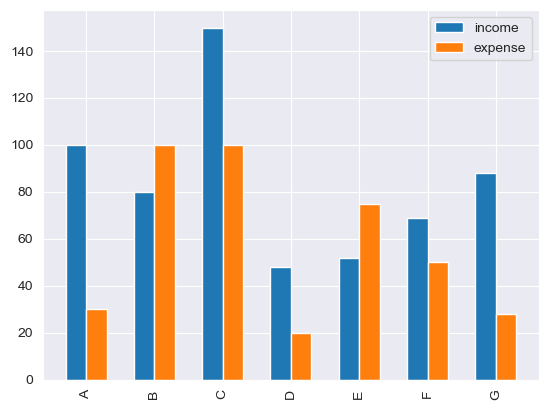

In [6]:
# With Matplotlib

fig, ax = plt.subplots()
p = np.arange(len(index))

width = 0.30

ax.bar(p - width/2, income, width, label="income")
ax.bar(p + width/2, expense, width, label="expense")

ax.set_xticks(p)
ax.set_xticklabels(index)

plt.legend()
plt.xticks(rotation=90);

In [7]:
df1 = df.reset_index()
df_melt = df1.melt(id_vars='index', var_name='Account', value_name='Count')
df_melt

,index,Account,Count
0,A,income,100
1,B,income,80
2,C,income,150
3,D,income,48
4,E,income,52
5,F,income,69
6,G,income,88
7,A,expense,30
8,B,expense,100
9,C,expense,100


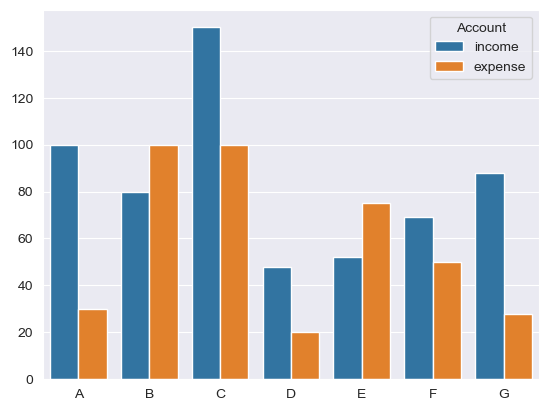

In [8]:
# With Seaborn

ax = sns.barplot(x="index", y="Count", data=df_melt, hue="Account")

ax.set(xlabel=None, ylabel=None);

## 3. Stack the bars

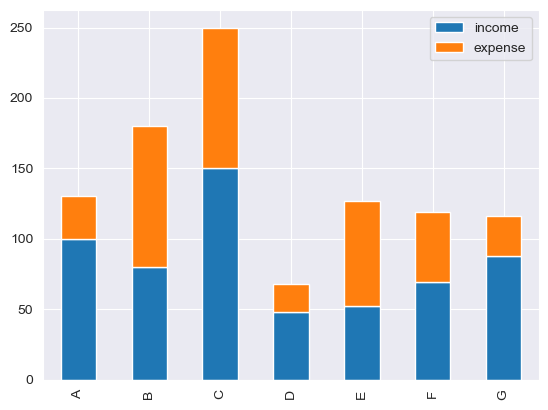

In [9]:
# With Pandas

df.plot.bar(stacked=True);

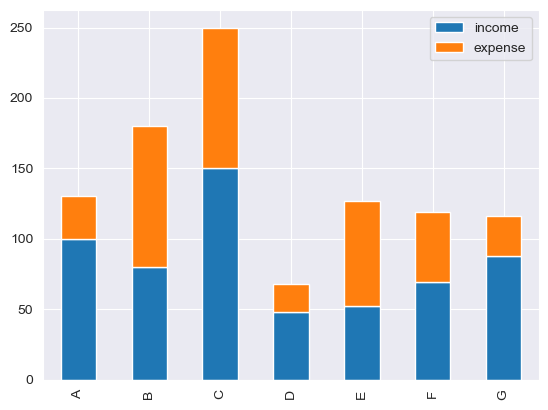

In [10]:
# With Pandas

df.plot(kind = "bar", stacked=True);

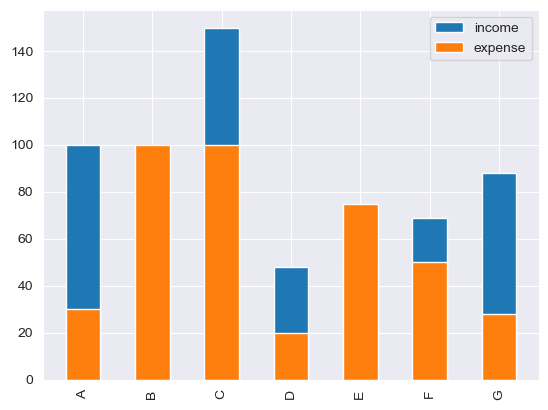

In [11]:
# With Matplotlib

fig, ax = plt.subplots()

ax.bar(index, income, label="income", width=0.50)
ax.bar(index, expense, label="expense", width=0.50)

plt.legend()
plt.xticks(rotation=90);

In [12]:
group_melt = df_melt.groupby(['index', 'Account'])['Count'].sum().reset_index()
group_melt

,index,Account,Count
0,A,expense,30
1,A,income,100
2,B,expense,100
3,B,income,80
4,C,expense,100
5,C,income,150
6,D,expense,20
7,D,income,48
8,E,expense,75
9,E,income,52


Seaborn fails to deliver a nice and purposeful stacked bar chart solution. [Their recommended approach](https://seaborn.pydata.org/examples/part_whole_bars.html) is not very intuitive and I much prefer the pandas or raw Matplotlib version.

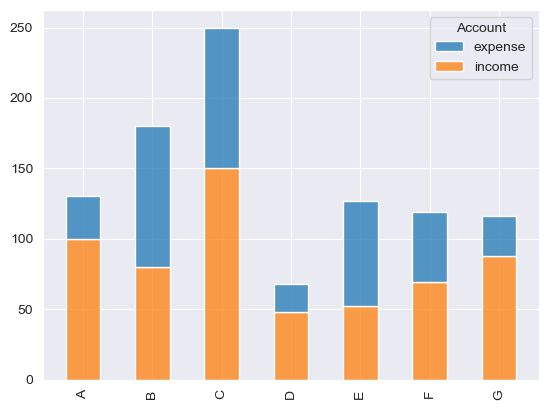

In [13]:
# With Seaborn
ax = sns.histplot(
            group_melt,
            x='index',
            # Use the value variable here to turn histogram counts into weighted values.
            weights='Count',
            hue='Account',
            multiple='stack',    
            # Add white borders to the bars.
            edgecolor='white',
            # Shrink the bars a bit so they don't touch.
            shrink=0.5,
            )
plt.xticks(rotation=90)

ax.set(xlabel=None, ylabel=None);

# # xticks setting to be empty
# ax.axes.xaxis.set_ticklabels([])

# # yticks setting to be empty
# ax.axes.yaxis.set_ticklabels([]);

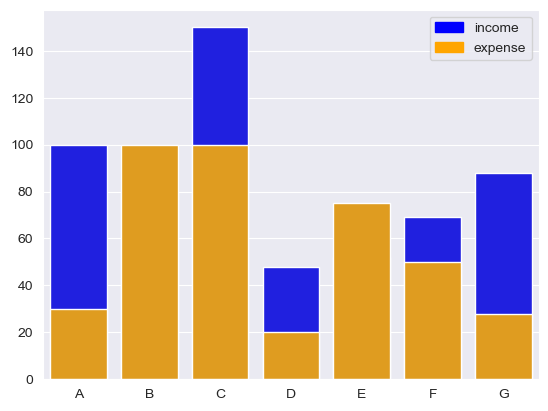

In [14]:
# With Seaborn

import matplotlib.patches as mpatches

bar1= sns.barplot(x="index", y="income", data=df.reset_index(), color='blue')
bar2 = sns.barplot(x="index", y="expense", data=df.reset_index(), color='orange')

# add legend
top_bar = mpatches.Patch(color='blue', label='income')
bottom_bar = mpatches.Patch(color='orange', label='expense')
plt.legend(handles=[top_bar, bottom_bar])

bar1.set(xlabel=None, ylabel=None);

## 4. Rotate the labels and set figsize

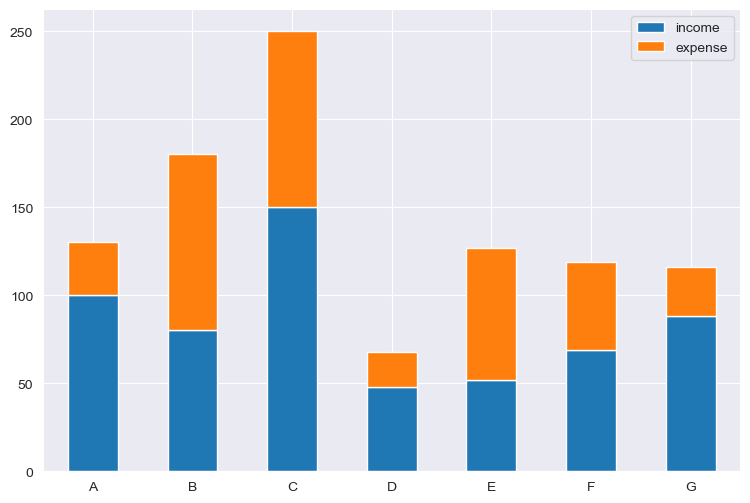

In [15]:
# With Pandas

df.plot.bar(stacked=True, rot = 0, figsize=(9,6));

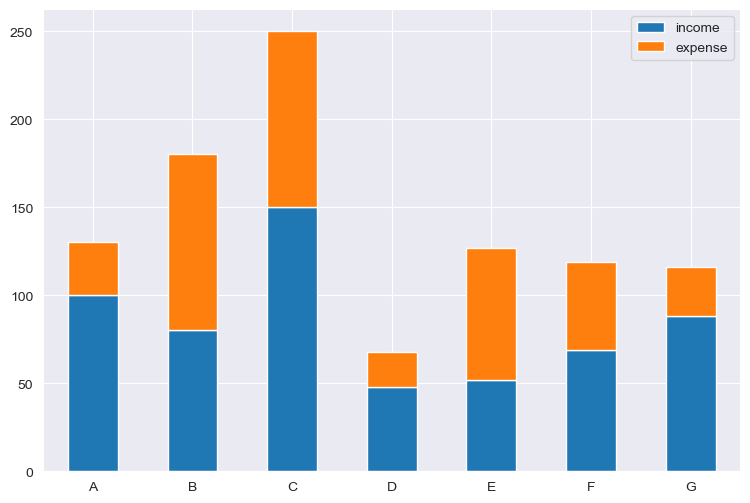

In [16]:
# With Pandas

df.plot.bar(stacked=True, figsize=(9,6));
plt.xticks(rotation=0);

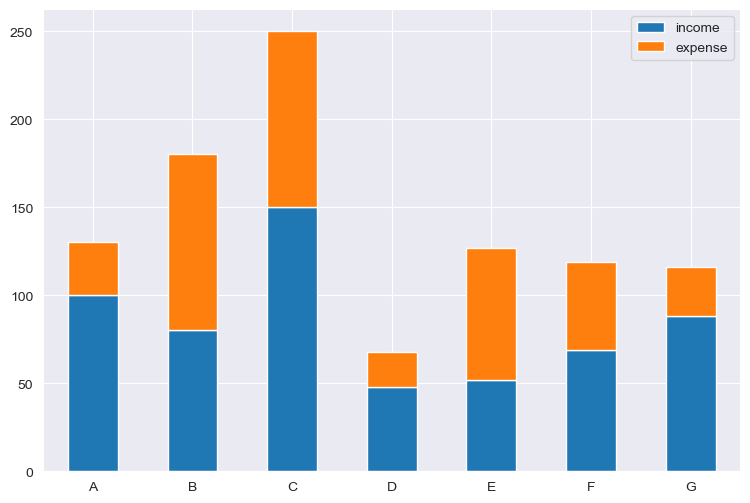

In [17]:
# With Pandas

df.plot.bar(figsize = (9,6), rot=0, stacked = True)
sns.set_style(style = "darkgrid")
plt.show()

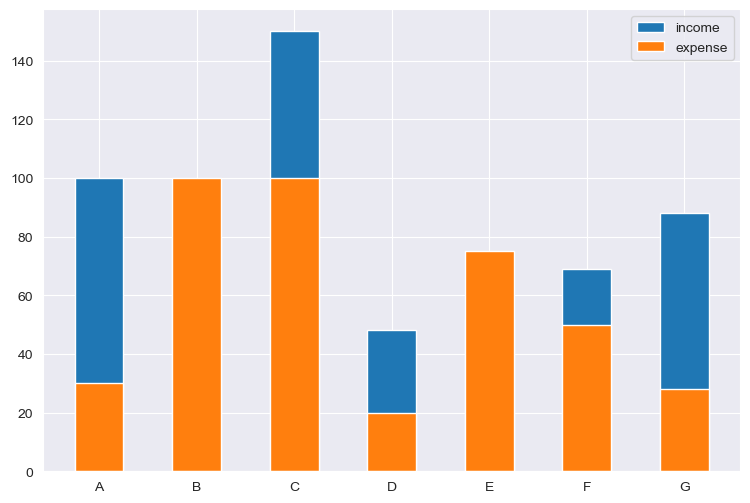

In [18]:
# With Matplotlib

fig, ax = plt.subplots(figsize = (9,6))

ax.bar(index, income, label="income", width=0.50)
ax.bar(index, expense, label="expense", width=0.50)

plt.legend();

[Text(0.5, 0, ''), Text(0, 0.5, '')]

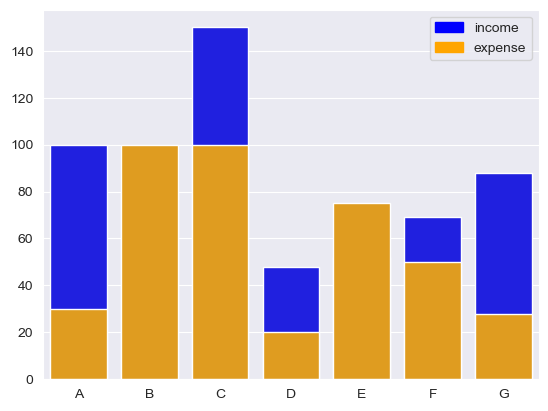

In [19]:
# With Seaborn

import matplotlib.patches as mpatches

bar1= sns.barplot(x="index", y="income", data=df.reset_index(), color='blue')
bar2 = sns.barplot(x="index", y="expense", data=df.reset_index(), color='orange')

# add legend
top_bar = mpatches.Patch(color='blue', label='income')
bottom_bar = mpatches.Patch(color='orange', label='expense')
plt.legend(handles=[top_bar, bottom_bar])

bar1.set(xlabel=None, ylabel=None)


## 5. Replace the labels by "Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"

In [20]:
df.reset_index(inplace=True, drop=True)
df

,income,expense
0,100,30
1,80,100
2,150,100
3,48,20
4,52,75
5,69,50
6,88,28


In [21]:
games = ["Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"]
df["games"] = games
df

,income,expense,games
0,100,30,Game-1
1,80,100,Game-2
2,150,100,Game-3
3,48,20,Game-4
4,52,75,Game-5
5,69,50,Game-6
6,88,28,Game-7


In [22]:
df.set_index("games", inplace = True)
# df.index.name=None
df

,income,expense
games,,
Game-1,100,30
Game-2,80,100
Game-3,150,100
Game-4,48,20
Game-5,52,75
Game-6,69,50
Game-7,88,28


In [23]:
df.reset_index()

,games,income,expense
0,Game-1,100,30
1,Game-2,80,100
2,Game-3,150,100
3,Game-4,48,20
4,Game-5,52,75
5,Game-6,69,50
6,Game-7,88,28


In [24]:
# df = df.set_axis(["Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"])

## 6. Unstuck the bars, annotate the hight of the bars on top of them

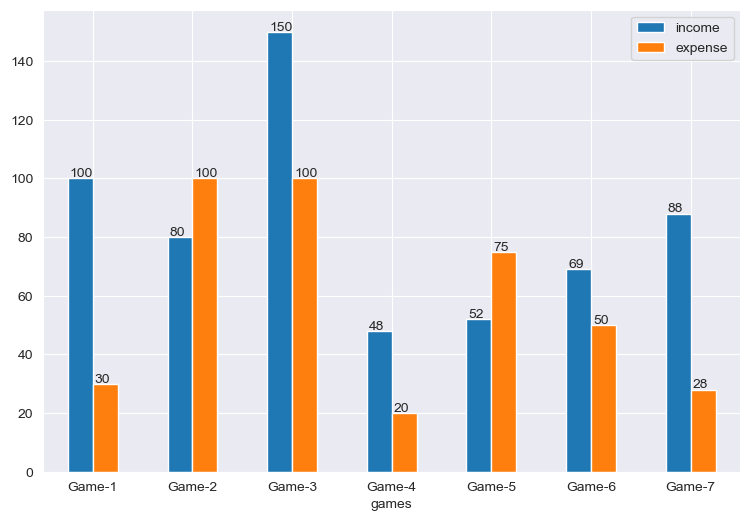

In [25]:
# With Pandas

ax = df.plot.bar(figsize=(9,6), rot=0)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.02, p.get_height()+0.5))

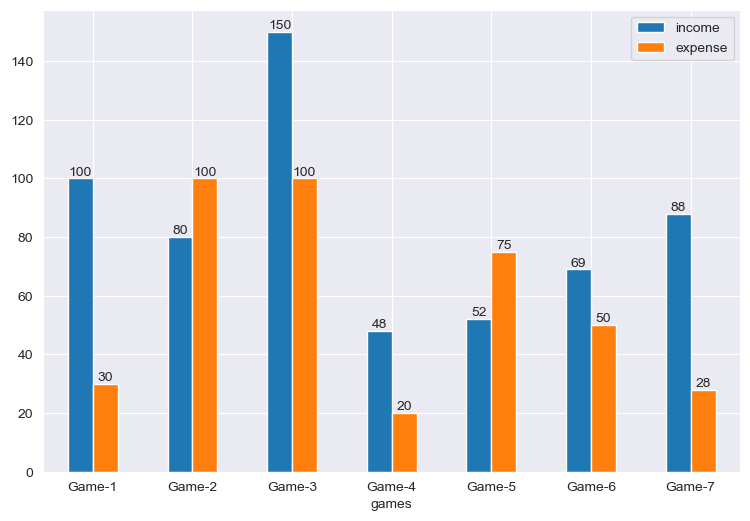

In [26]:
# With Pandas

fig, ax=plt.subplots(figsize=(9,6))

df.plot(kind='bar', ax=ax, rot=0)

for container in ax.containers:
    ax.bar_label(container) 

In [27]:
df1 = df.reset_index()
df_melt_unstack = df1.melt(id_vars='games', var_name='Account', value_name='Count')
df_melt_unstack

,games,Account,Count
0,Game-1,income,100
1,Game-2,income,80
2,Game-3,income,150
3,Game-4,income,48
4,Game-5,income,52
5,Game-6,income,69
6,Game-7,income,88
7,Game-1,expense,30
8,Game-2,expense,100
9,Game-3,expense,100


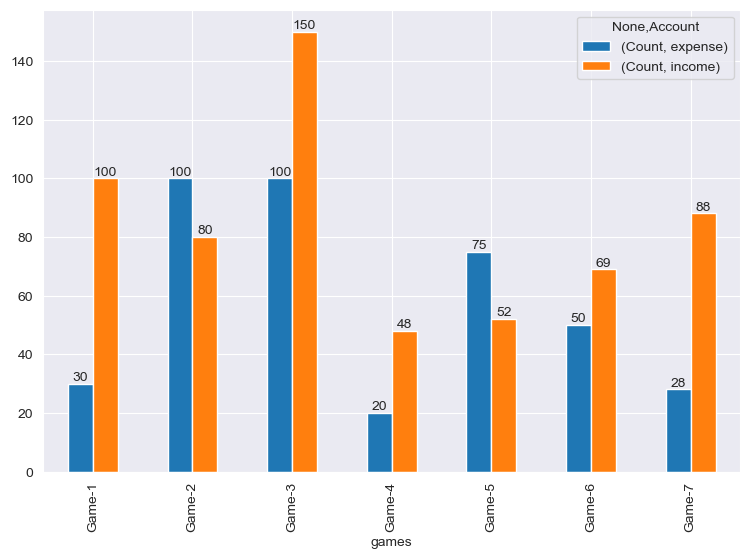

In [28]:
ax = df_melt_unstack.groupby(["games", "Account"]).mean().unstack().plot.bar(figsize=(9, 6))

for container in ax.containers:
    ax.bar_label(container)

In [29]:
# With Matplotlib


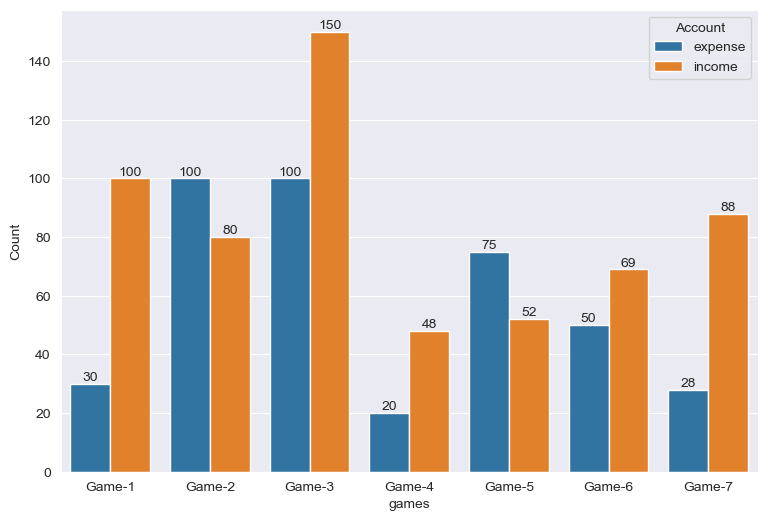

In [30]:
# With Seaborn

df2 = df_melt_unstack.groupby(["games", "Account"]).mean()
df2.reset_index(inplace=True)

plt.figure(figsize=(9, 6))
ax = sns.barplot(x='games', y='Count', data=df2, hue="Account")

for container in ax.containers:
    ax.bar_label(container)

# Histograms

In [31]:
tips=sns.load_dataset("tips")

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 7. Histogram of the total_bill column

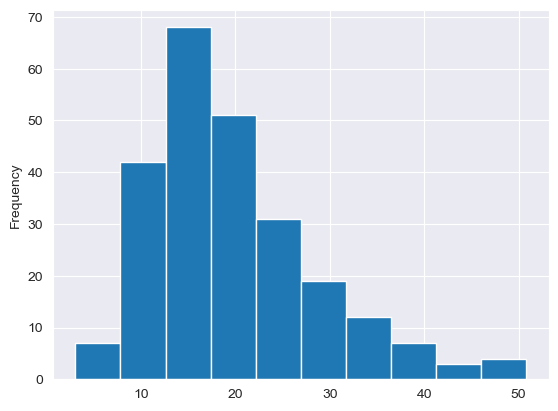

In [33]:
# With Pandas

tips.total_bill.plot.hist(bins=10);

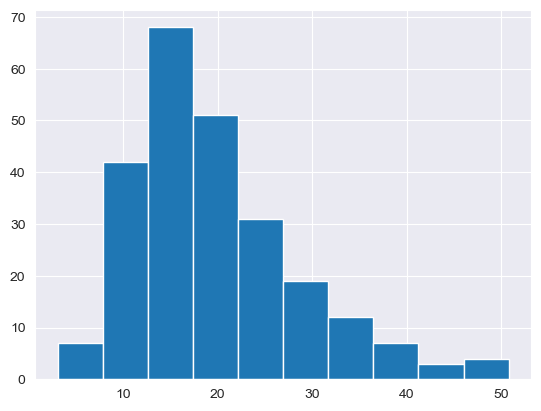

In [34]:
# With Matplotlib

plt.hist(tips.total_bill);

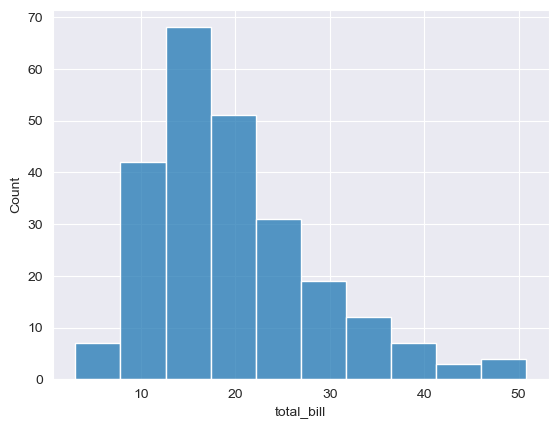

In [35]:
# With Seaborn

sns.histplot(tips.total_bill, bins=10);

# Lineplots

In [36]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 8. Plot the avg tip by size  (lineplot)

In [37]:
df1= tips.groupby('size')['tip'].mean()
df1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

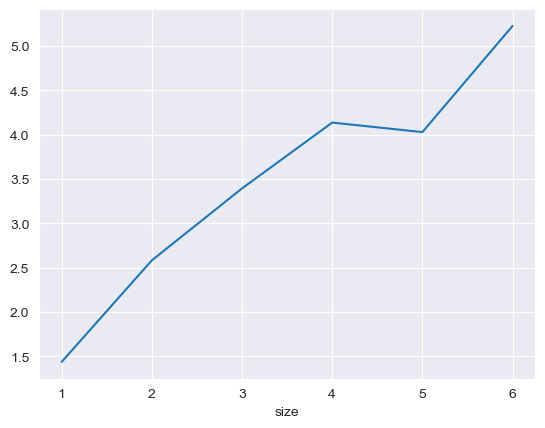

In [38]:
# With Pandas

tips.groupby('size').tip.mean().plot();

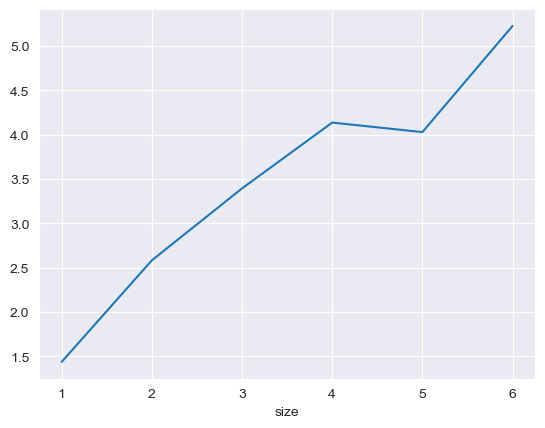

In [39]:
# With Pandas

tips.groupby('size').tip.mean().plot.line();

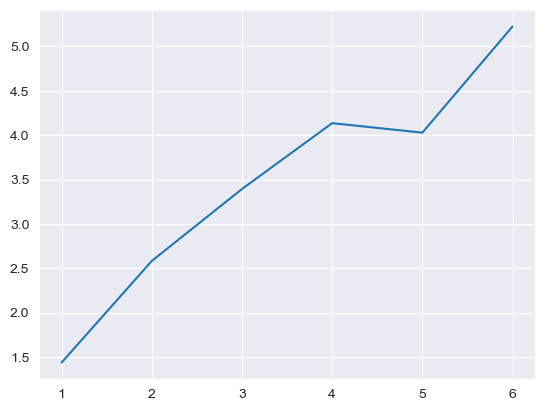

In [40]:
# With Matplotlib

plt.plot(tips.groupby('size').tip.mean());

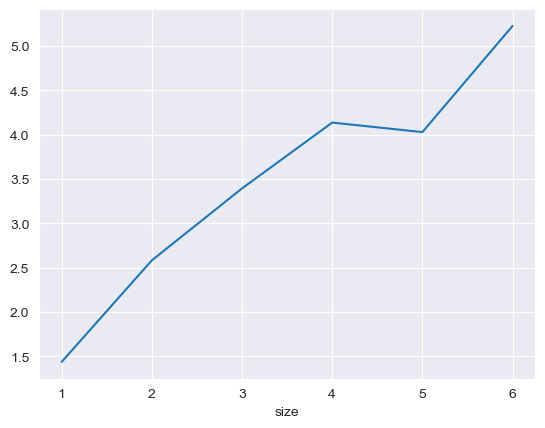

In [41]:
# With Matplotlib

plt.plot(df1.index, df1.values)
plt.xlabel("size");

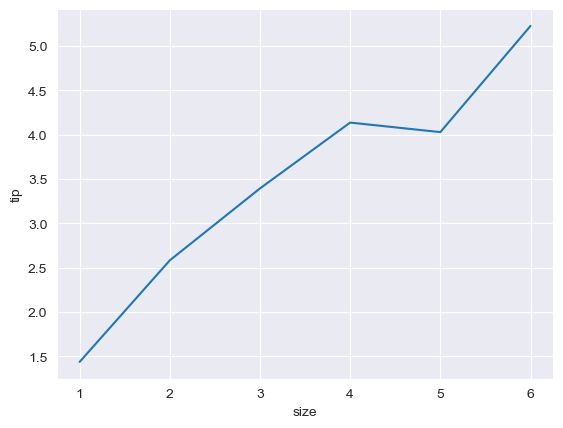

In [42]:
# With Seaborn

sns.lineplot(data=tips, x="size", y="tip", ci=None);

## 8.Set the linestyle as "--"

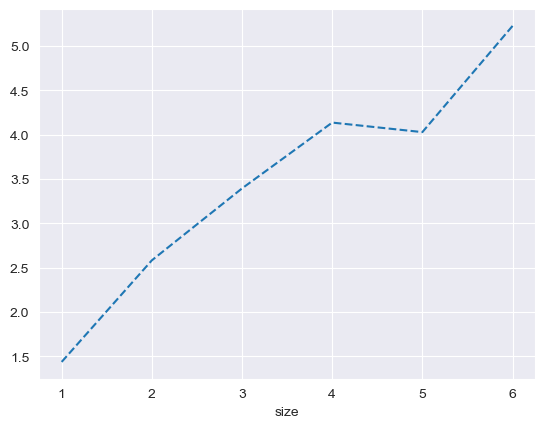

In [43]:
# With Pandas

tips.groupby('size').tip.mean().plot(ls="--");

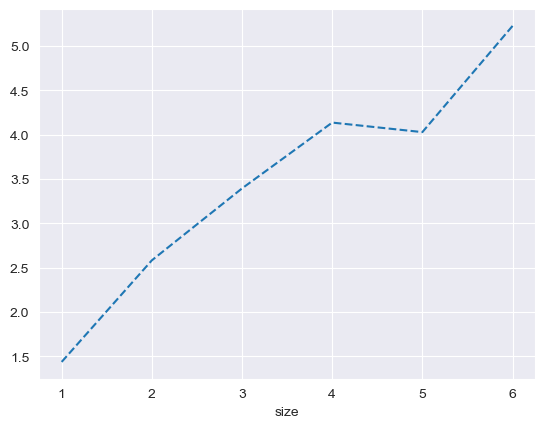

In [44]:
# With Pandas

tips.groupby('size').tip.mean().plot.line(ls="--");

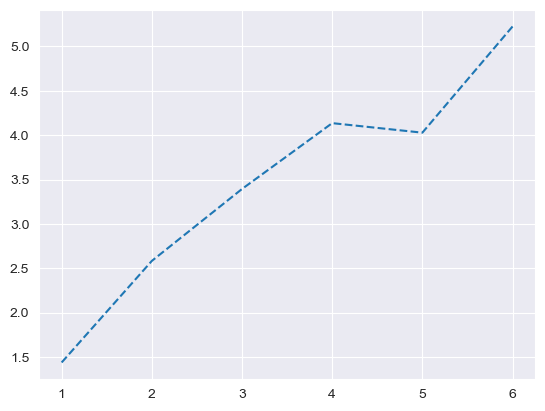

In [45]:
# With Matplotlib

plt.plot(tips.groupby('size').tip.mean(), ls="--");

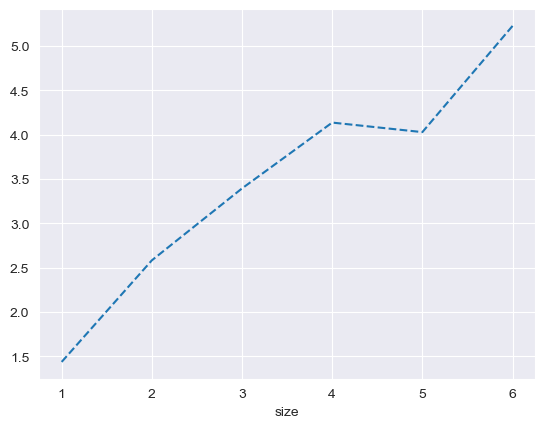

In [46]:
# With Matplotlib

plt.plot(df1.index, df1.values, ls="--")
plt.xlabel("size");

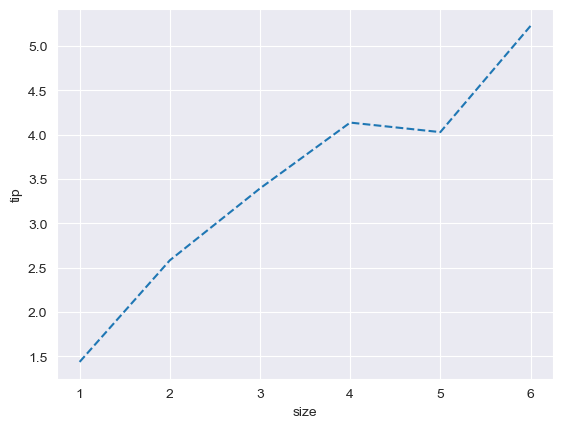

In [47]:
# With Seaborn

sns.lineplot(data=tips, x="size", y="tip", ci=None, ls="--");

# Scatter Plots

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 10. Make a scatter plot between tip and total_bill

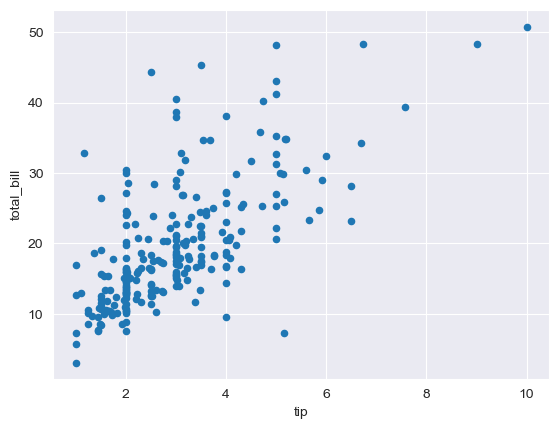

In [49]:
# With Pandas

tips.plot.scatter("tip", "total_bill");

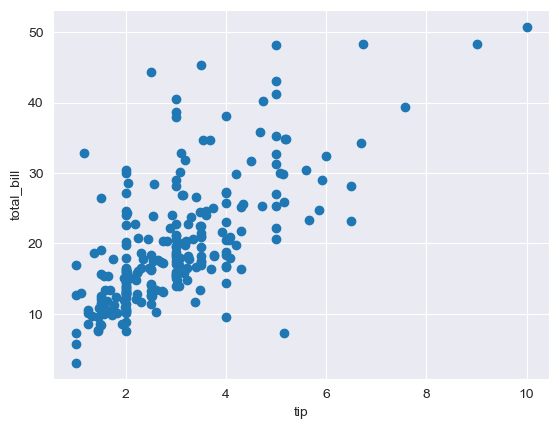

In [50]:
# With Matplotlib

plt.scatter(tips["tip"], tips["total_bill"])
plt.xlabel("tip")
plt.ylabel("total_bill");

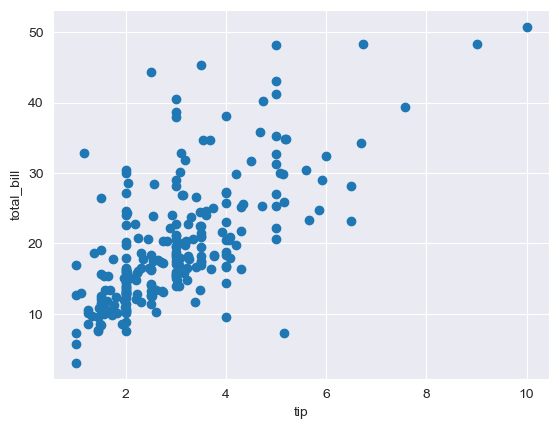

In [51]:
# With Matplotlib

plt.scatter(x="tip", y="total_bill", data=tips)
plt.xlabel("tip")
plt.ylabel("total_bill");

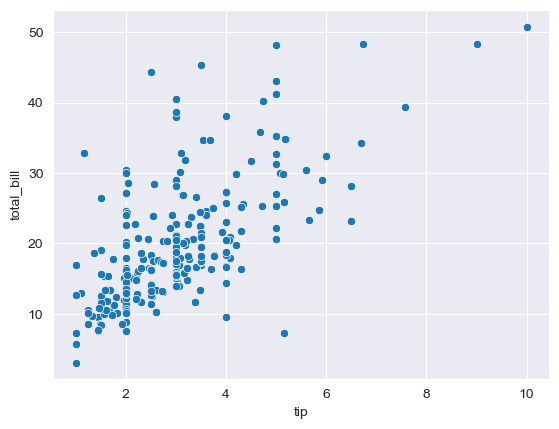

In [52]:
# With Seaborn

sns.scatterplot(x = "tip", y = "total_bill", data = tips);

## 11. Set an additional dimension using size column

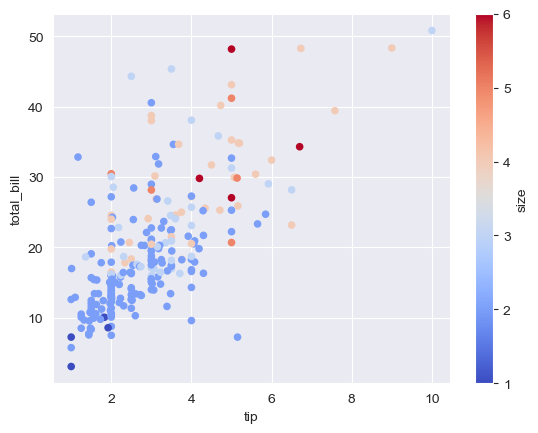

In [53]:
# With Pandas

tips.plot.scatter("tip", "total_bill", c="size", cmap="coolwarm");

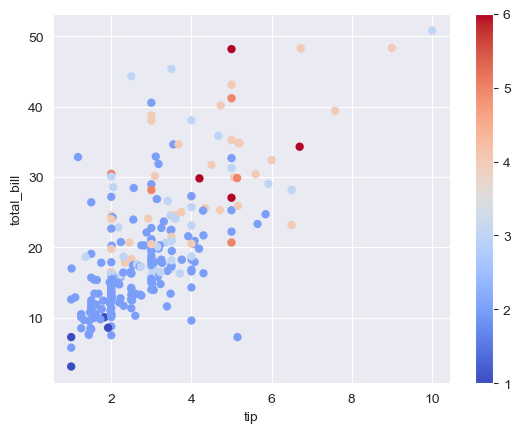

In [54]:
# With Matplotlib

plt.scatter(tips["tip"], tips["total_bill"], linewidth = 0.001, c = tips["size"], cmap='coolwarm')
plt.colorbar()
plt.xlabel("tip")
plt.ylabel("total_bill")
plt.show()

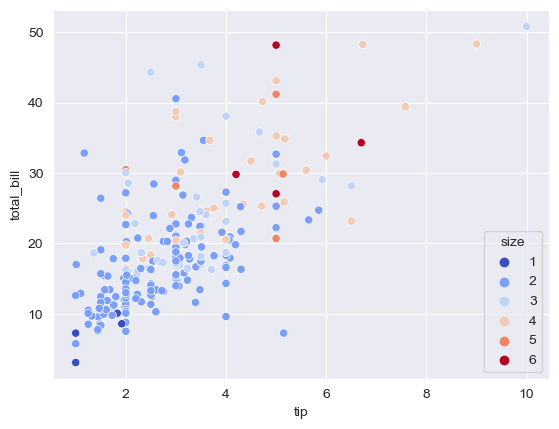

In [55]:
# With Seaborn

sns.scatterplot(x='tip', y='total_bill', hue='size', data= tips, palette='coolwarm',legend="full");

In [56]:
# Öncelikle scatter çizdirme amacımız; iki değişken arasındaki ilişkiyi ve dağılımı gözlemleyebilmektir.

# Seaborn ile Heatmap çizdirirken cbar=False diyerek sağdaki size sıkalasını kaldırabiliyoruz. 

# Ama seaborn ile scatterplot çizdirirken cbar diye bir parametre kullanamıyoruz.

# Bunun yerine legend parametresi ile oynayarak sağ alt tarafta gördüğünüz şekilde size sütununu boyutsal olarak renk renk gösterebiliyor.

# Boxplots

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 12. Make a box plot of total_bill column

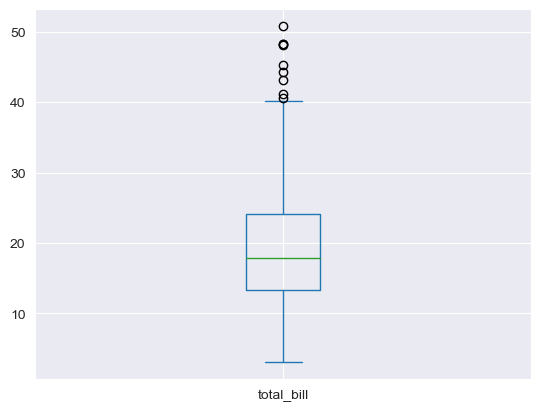

In [58]:
# With Pandas

tips["total_bill"].plot.box();

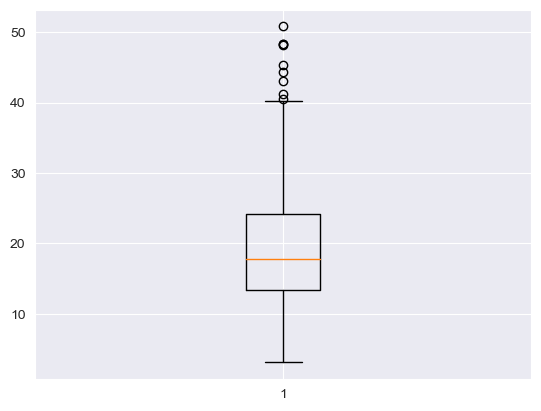

In [59]:
# With Matplotlib

plt.boxplot(tips["total_bill"]);

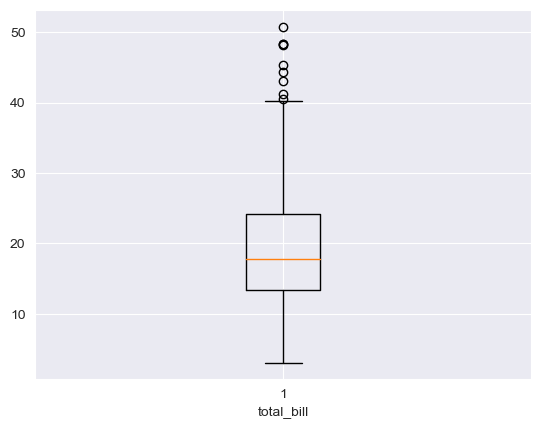

In [60]:
# With Matplotlib

plt.boxplot(tips["total_bill"])
plt.xlabel('total_bill');

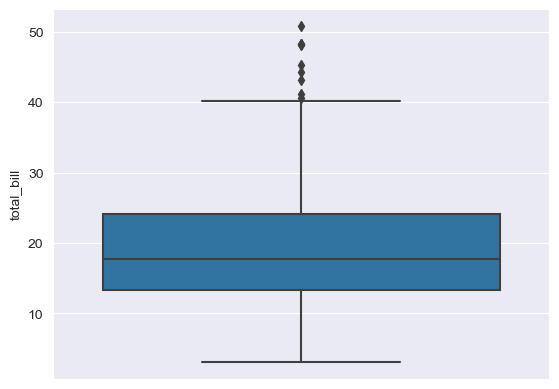

In [61]:
# With Seaborn

sns.boxplot(y = 'total_bill', data = tips);

<AxesSubplot:xlabel='total_bill'>

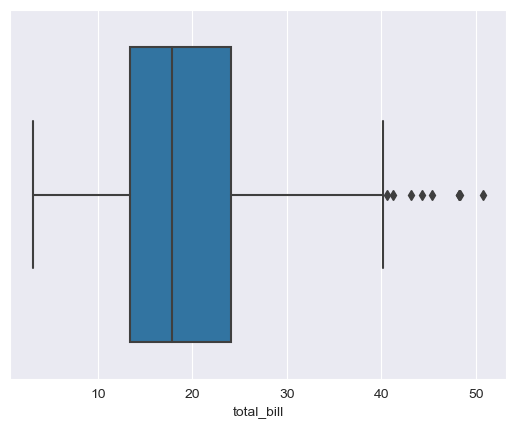

In [62]:
sns.boxplot(x = 'total_bill', data = tips)

## 13. Seperate the the boxplot above using size columns

In [63]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

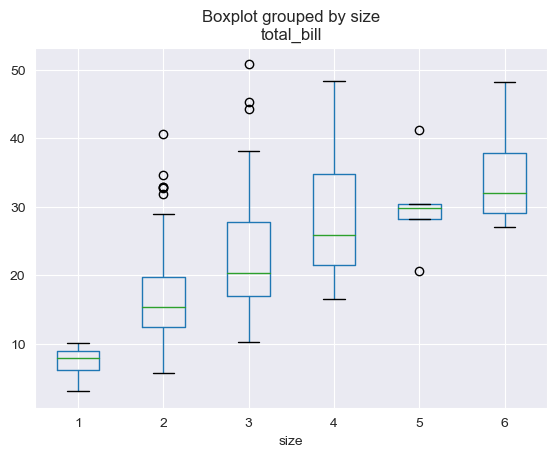

In [64]:
# With Pandas

tips.boxplot(column="total_bill", by="size");

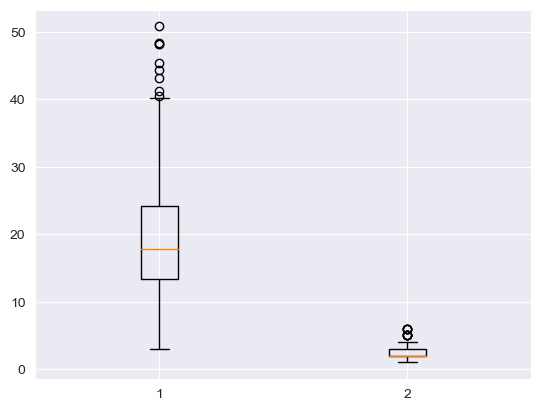

In [65]:
# With Matplotlib

plt.boxplot(tips[["total_bill", "size"]])
plt.show() 

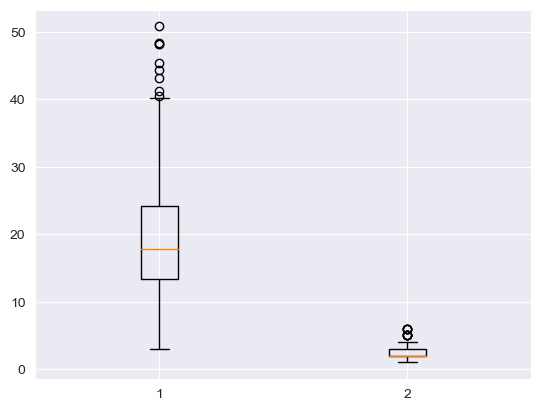

In [66]:
plt.boxplot(tips.loc[:, ["total_bill", "size"]].values)
ax.set_xticks(tips['size'].unique())
plt.show() 

## 14. Make the same plot using seaborn

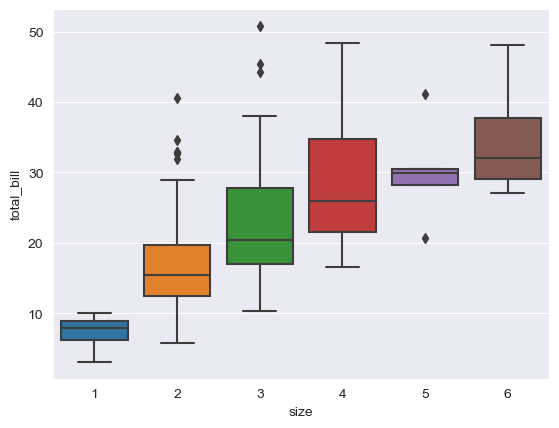

In [67]:
sns.boxplot(x="size", y="total_bill", data=tips);

## 15. Make a violinplot instead of boxplot and discuss the difference between boxplot and violinplot

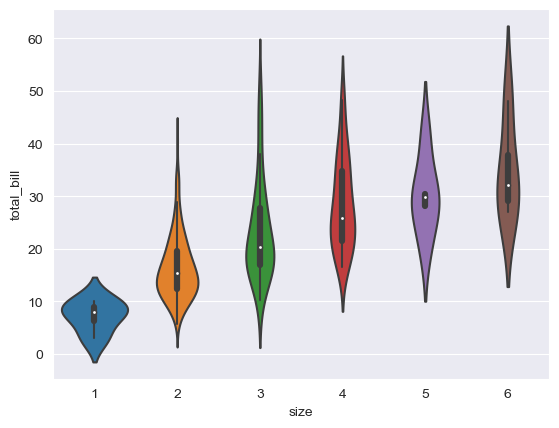

In [68]:
sns.violinplot(x="size", y="total_bill", data=tips);

___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___